# SLO Police Logs: Tidy

In [1]:
import pandas as pd

In this exercise, you will parse police log data from the [City of San Luis Obispo](http://www.slocity.org) in California. Each day, the police department posts a text log file of all the incidents for that day:

http://www.slocity.org/government/department-directory/police-department/police-log

A dataset of these log files is available in the data directory. You will parse these files into a tidy `DataFrame`.

## Parse a single incident entry

First, you will write a series of functions that parse a single incident entry. You may find the following `MARKER` text to be helpful:

In [2]:
MARKER = '====='

A single text file consists of a series of incident entries, where each entry looks something like this:

In [3]:
entry = """===============================================================================
160728012 07/28/16 Received:07:11 Dispatched:07:13 Arrived:      Cleared:07:15
===============================================================================
Type: Alarm Audible                                           Location:PN13
As Observed:


Addr: 12318 LOS OSOS VALLEY; ENTERPRISE RENT A   Clearance Code:Call Cancelled

Responsible Officer: Benson, G
Units: 4245  ,4231
 Des: incid#=160728012 Completed call disp:CAN clr:CAN call=18l
CALL COMMENTS: FRONT DOOR, REAR MOTION
"""

It is important to note that the exact format of the entries varies widely. To get a better sense of what you are up against, you should `cat` some of the data files before starting this exercise.

First, write a function that takes the header line of an entry (the line between the two `MARKER` lines), and returns a Python `dict` for the values in the header. See the tests below for the exact fields you should extract. You will likely have to deal with the possibility of missing values.

In [4]:
def parse_header(text):
    """Parse the incident header line as text and return a python dict."""
    # YOUR CODE HERE
    text = text.lower().strip()
    text = text.split()
    text = [x.split(":",1) for x in text]
    header = {"arrived": "", "cleared": "", "date": "", "dispatched": "", "id": "", "received": ""}
    header["id"] = text[0][0]
    header["date"] = text[1][0]
    categories = ["received", "dispatched", "arrived", "cleared"]
    for i in range(2, len(text)):
        if text[i][0] in categories and text[i][1] != "":
            header[text[i][0]] = text[i][1]
    return header

In [5]:
h = parse_header(entry.splitlines()[1])
assert h == \
    {'arrived': '',
     'cleared': '07:15',
     'date': '07/28/16',
     'dispatched': '07:13',
     'id': '160728012',
     'received': '07:11'}

Not write a function that takes takes the line of text containing the `Type` and `Location` and return a `dict` of those fields. Again, you will have to deal with the possibility of missing values.

In [6]:
def parse_type_location(text):
    """Parse the type/location line of text into a dict."""
    # YOUR CODE HERE
    text = text.strip().lower()
    text = text.split()
    type_location = {"location" : "", "type" : ""}
    for i in range(len(text)):
        if text[i] == "type:":
            next_word_index = i + 1
            insert_string = ""
            while "location" not in text[next_word_index]:
                if len(insert_string) > 1:
                    insert_string += " "
                insert_string += text[next_word_index]
                next_word_index += 1
            type_location["type"] = insert_string
        
        elif "location" in text[i]:
            info = text[i].split(":")
            if len(info) == 2:
                type_location["location"] = info[1]
    return type_location 

In [7]:
type_location = parse_type_location(entry.splitlines()[3])
assert type_location=={'location': 'pn13', 'type': 'alarm audible'}
type_location = parse_type_location('Type: this that Location:')
assert type_location == {'location': '', 'type': 'this that'}

Write a function to parse the line with `Units` into a `dict`:

In [8]:
def parse_units(text):
    """Parse the line containing `Units:` into a dict."""
    text = text.strip().lower()
    text = text.split()
    units = {"units": []}
    if len(text) == 1:
        return units
    for i in range(1, len(text)):
        num = text[i].split(",")
        if len(num) == 1:
            units["units"].append(num[0])
        else:
            for entry in num:
                if entry != "":
                    units["units"].append(entry)
    return units

In [9]:
units = parse_units(entry.splitlines()[-3])
assert units=={'units': ['4245', '4231']}
units = parse_units('Units:')
assert units=={'units': []}

Write a function that parses an entire incident entry. Handle the following lines of the entry:

* The header line
* The type/location line
* The units line

Your function should call the above functions that parse each of these lines; other lines should be ignored.

In [10]:
def parse_incident(text):
    """Parse an indicent entry into a python dict."""
    # making sure the line actually contains the thing we want
    lines = text.splitlines()
    dictionary = {}
    for line in lines: 
        if "Arrived" in line:
            dictionary.update(parse_header(line))
        if "Type" in line:
            dictionary.update(parse_type_location(line))
        if "Unit" in line:
            dictionary.update(parse_units(line))
    return dictionary

    

In [11]:
incident = parse_incident(entry)
assert incident == \
    {'arrived': '',
     'cleared': '07:15',
     'date': '07/28/16',
     'dispatched': '07:13',
     'id': '160728012',
     'location': 'pn13',
     'received': '07:11',
     'type': 'alarm audible',
     'units': ['4245', '4231']}

## Read all files and parse the entries

In [12]:
import glob
files = glob.glob('/data/slo_police_logs_2017-02/*2016-08*.txt')
files

['/data/slo_police_logs_2017-02/SLOPolice_TDGAcq2016-08-05-1901.txt',
 '/data/slo_police_logs_2017-02/SLOPolice_TDGAcq2016-08-03-1700.txt',
 '/data/slo_police_logs_2017-02/SLOPolice_TDGAcq2016-08-22-1700.txt',
 '/data/slo_police_logs_2017-02/SLOPolice_TDGAcq2016-08-15-1700.txt',
 '/data/slo_police_logs_2017-02/SLOPolice_TDGAcq2016-08-29-1700.txt',
 '/data/slo_police_logs_2017-02/SLOPolice_TDGAcq2016-08-19-1700.txt',
 '/data/slo_police_logs_2017-02/SLOPolice_TDGAcq2016-08-18-1700.txt',
 '/data/slo_police_logs_2017-02/SLOPolice_TDGAcq2016-08-10-2052.txt',
 '/data/slo_police_logs_2017-02/SLOPolice_TDGAcq2016-08-02-1200.txt',
 '/data/slo_police_logs_2017-02/SLOPolice_TDGAcq2016-08-31-1700.txt',
 '/data/slo_police_logs_2017-02/SLOPolice_TDGAcq2016-08-10-2050.txt',
 '/data/slo_police_logs_2017-02/SLOPolice_TDGAcq2016-08-23-1700.txt',
 '/data/slo_police_logs_2017-02/SLOPolice_TDGAcq2016-08-24-1700.txt',
 '/data/slo_police_logs_2017-02/SLOPolice_TDGAcq2016-08-11-1920.txt',
 '/data/slo_police_l

Write a generator function that takes a list of filenames and yields the lines of the files:

In [13]:
def files_to_lines(files):
    """Take a list of files and yield their lines."""
    for file in files:
        with open(file) as f:
            lines = f.readlines()
            for line in lines:
                yield line.strip()

In [14]:
import hashlib, types
lines_hash = hashlib.md5()
for line in files_to_lines(files):
    lines_hash.update(line.encode())
assert lines_hash.hexdigest()=='5aec19b16d5457832d5ccc4ba02930a2'
assert type(files_to_lines(files)) == types.GeneratorType

Write a generator function that consumes an iterator of lines from the incident files, and yields a sequence of text based incident entries. Each entry that is yielded should be a single string, with embedded newlines.

In [15]:
def lines_to_indicents(lines):
    """Consume an iterator of lines, yield text blocks of for each incident."""
    return_string = ""
    marker_count = 0
    end = "--------------------------------------------------------------------------------\n"
    for line in lines:
        if MARKER in line:
            marker_count += 1
        if marker_count >= 3:
            marker_count = 1
            yield return_string 
            return_string = ""
        if line == end:
            yield return_string 
            break
        if marker_count != 0:
            return_string += line + "\n"


Using the functions you have defined above, iterate through the filenames in the variable `files`, parse all the incident entries into Python `dict` objects and return a list of those objects named `incidents`:

In [16]:
incidents = []

lines = files_to_lines(files)
incidents_dicts = lines_to_indicents(lines)
for incident in incidents_dicts:
    incident = incident.strip()
    incidents.append(parse_incident(incident))



In [17]:
incidents[200]

{'arrived': '11:01',
 'cleared': '11:25',
 'date': '08/19/16',
 'dispatched': '10:58',
 'id': '160819036',
 'location': 'pn5',
 'received': '10:57',
 'type': 'disorderly',
 'units': ['4268', '4231']}

In [18]:
incidents[100]

{'arrived': '06:33',
 'cleared': '06:34',
 'date': '08/05/16',
 'dispatched': '06:18',
 'id': '160805013',
 'location': 'pn11',
 'received': '06:16',
 'type': 'alarm audible',
 'units': ['4266', '4266', '4265']}

In [19]:
assert len(incidents) == 2616
assert type(incidents) == list
assert incidents[100] == \
    {'arrived': '06:33',
     'cleared': '06:34',
     'date': '08/05/16',
     'dispatched': '06:18',
     'id': '160805013',
     'location': 'pn11',
     'received': '06:16',
     'type': 'alarm audible',
     'units': ['4266', '4266', '4265']}
assert incidents[200] == \
    {'arrived': '11:01',
     'cleared': '11:25',
     'date': '08/19/16',
     'dispatched': '10:58',
     'id': '160819036',
     'location': 'pn5',
     'received': '10:57',
     'type': 'disorderly',
     'units': ['4268', '4231']}

## Create the incident DataFrame

Convert the `incidents` list-of-dicts to a Pandas `DataFrame` named `incidents_df` with a format given by the tests below.

In [20]:
# YOUR CODE HERE
incidents_df = pd.DataFrame(incidents)
incidents_df = incidents_df[["arrived", "cleared", "date", "dispatched", "id", "location", "received", "type"]]

In [21]:
incidents_df.head()

,arrived,cleared,date,dispatched,id,location,received,type
0,07:37,07:48,08/04/16,07:26,160804007,pn7,07:23,traffic hazard
1,07:52,08:01,08/04/16,07:42,160804008,pn5,07:40,loitering
2,,,08/04/16,,160804009,pn8,08:02,muni code viol
3,,08:07,08/04/16,08:07,160804010,pn1,08:03,aband vehicle
4,08:22,08:28,08/04/16,,160804011,pn5,08:14,mc-panhandling


In [22]:
assert list(incidents_df.location.unique()) == \
    ['pn7', 'pn5', 'pn8', 'pn1', 'pn13', 'pn10', 'pn2', 'pn9', 'pn12',
    'pn11', 'pn6', 'pn3', 'lz0', 'pn4', '']
assert len(incidents_df['type'].unique()) == 81
assert list(incidents_df.columns) == \
    ['arrived', 'cleared', 'date', 'dispatched', 'id', 'location',
     'received', 'type']

Create a second `DataFrame`, named `units_df` with two columns:

* The `id` of the incident
* The `unit` that handled the call.

If there are multiple units for an id, insert multiple rows for that id (one for each unit). This is needed to make this `DataFrame` tidy.

In [23]:
# YOUR CODE HERE
incidents_df_new = pd.DataFrame(incidents)
new_dataframe = []
for idx, row in incidents_df_new.iterrows():
    if len(row.loc["units"]) == 1:
        if row.loc["units"][0] == "":
            continue
        temp_dict = {"id": row.loc["id"], "unit": row.loc["units"][0]}
        new_dataframe.append(temp_dict)
    else:
        for i in range(len(row.loc["units"])):
            if row.loc["units"][i] == "":
                continue
            temp_dict = {"id": row.loc["id"], "unit": row.loc["units"][i]}
            new_dataframe.append(temp_dict)
units_df = pd.DataFrame(new_dataframe)


In [24]:
units_df.head()

,id,unit
0,160804007,42k4
1,160804007,4202
2,160804008,4226
3,160804008,4218
4,160804009,set


In [25]:
#units_df.groupby(by = "unit").agg("total")

In [26]:
assert len(units_df) == 4617
assert list(units_df.columns) == ['id', 'unit']

## Visualize

In [27]:
import altair as alt
alt.enable_mime_rendering()

Create a single visualization using Altair that explores this dataset visually and begins to provide a high level overview of the information in the dataset.

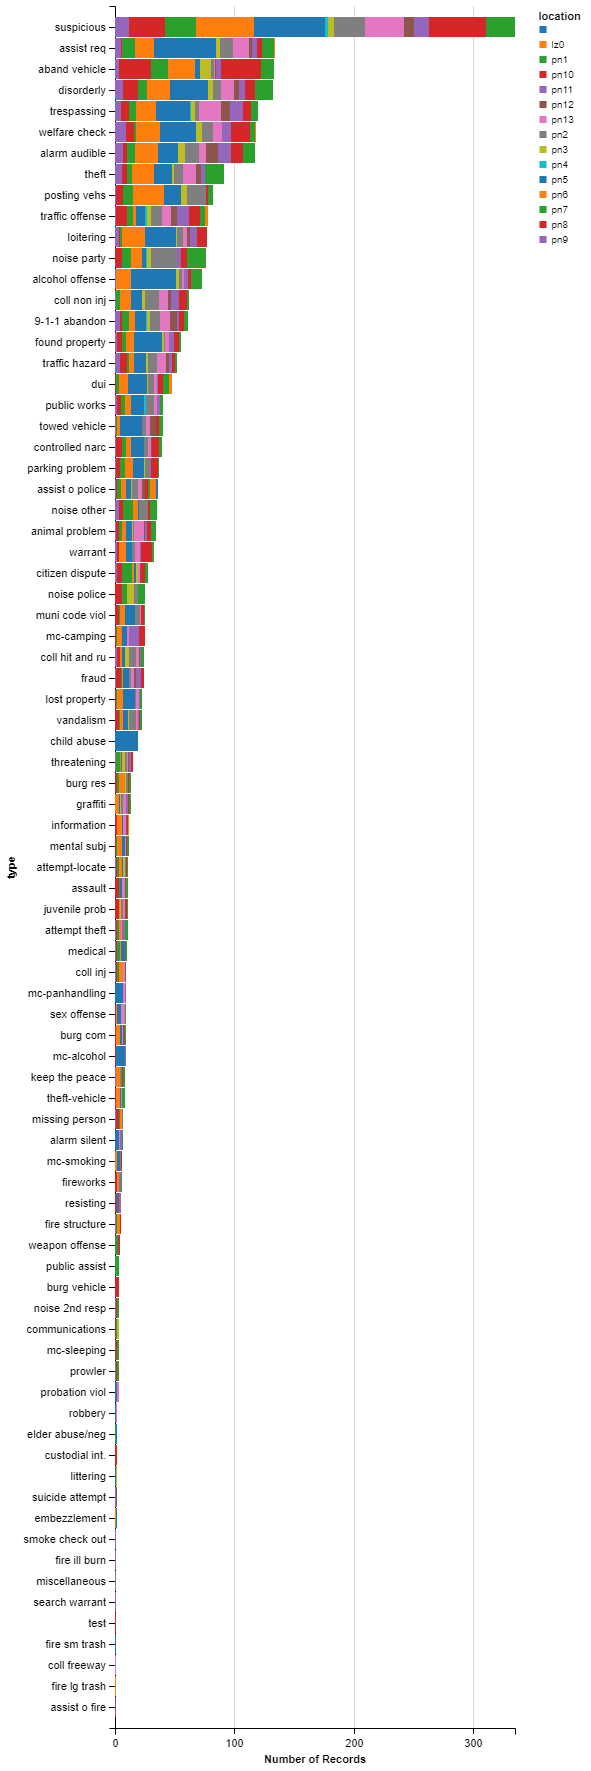

In [28]:
alt.Chart(incidents_df).mark_bar().encode(
    alt.Y("type:O", sort = alt.SortField(field = "type", op = "count", order = "descending")),
    alt.X("count(*)"),
    alt.Color("location:N")
)

Looking at the occurances of each reason for police call, we see that the top 3 is "suspicious activity", "assistance required", and "abandoned vehicle". The suspicious activity is mostly occurs in locations pn5, pn6, pn8, and pn13. While assistance required occurs mostly in locations lz0, pn1, and pn13.